In [2]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [15]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [16]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002175F6806C8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002175F680B88>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002175F680F88>)

In [17]:
mnist.train.images.shape,mnist.train.labels.shape

((55000, 784), (55000, 10))

In [21]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [22]:
mnist.test.images.shape,mnist.test.labels.shape

((10000, 784), (10000, 10))

In [20]:
mnist.validation.images.shape

(5000, 784)

In [23]:
import numpy as np
import matplotlib.pyplot as plt

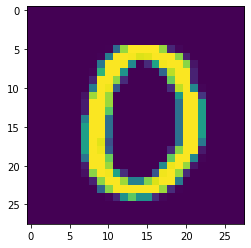

In [27]:
first_image = mnist.train.images[10]
first_image = np.array(first_image,dtype = 'float')
first_image = first_image.reshape(28,28)
plt.imshow(first_image)
plt.show()

In [37]:
#saving number of nodes in each layer
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10


#Randomly initialising weights for each layer
weights = {
    'h1': tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_1,n_classes]))
}

#Randomly initialising biases for each layer
biases = {
    'h1' : tf.Variable(tf.random_normal([n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_classes]))
}

In [31]:
def forward_propagation(x,weights,biases):
    in_layer1 = tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
    return output

# Tensorflow code for forward propagation with optimizer

In [92]:
x = tf.placeholder("float",[None,n_input])
y = tf.placeholder(tf.int32,[None,n_classes])
pred = forward_propagation(x,weights,biases)

In [93]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred,labels = y))

In [105]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.015)
optimize = optimizer.minimize(cost)

In [106]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [107]:
batch_size = 100
for i in range(30):
    num_batch = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batch):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        c,opt = sess.run([cost,optimize],feed_dict = {x:batch_x,y:batch_y})
        total_cost += c
    print(total_cost)

25446.271005392075
3658.4009770881385
2066.866356098867
1436.519630152848
1120.9012965195598
904.8577475197394
788.9222553157056
560.912719337806
465.63127055086863
375.3123959230879
341.6745443137736
272.7389370100062
165.28815598075744
149.52669643051922
134.67156466279994
117.53379499074072
126.22523027472198
130.0031989235431
112.98128235945478
100.57177411718294
96.10467207292095
88.69506271008868
106.48237700480968
87.12765095859504
80.01536985166604
91.58773963100975
80.2340455962476
73.995948704076
85.8400939599378
70.25084367755335


In [108]:
pred = forward_propagation(x,weights,biases)
prediction = tf.argmax(pred,1)
true_labels = tf.argmax(y,1)
correct_predictions = tf.equal(prediction,true_labels)
prediction_eval,labels,correct_pred = sess.run([prediction,true_labels,correct_predictions],feed_dict = {x:mnist.test.images,y:mnist.test.labels})
correct_pred.sum()

9612

In [53]:
#Tensorflow code for forward propagation only
sess = tf.Session()
sess.run(tf.global_variables_initializer())
x = tf.placeholder("float",[None,n_input])
y = tf.placeholder(tf.int32,[None,n_classes])

In [45]:
#To find cost between predicted and true labels
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred,labels = y))

In [39]:
#forward propagation prediction using tensorflow without optimizing weights
pred = forward_propagation(x,weights,biases)
prediction = tf.argmax(pred,1)
true_labels = tf.argmax(y,1)
correct_predictions = tf.equal(prediction,true_labels)

In [42]:
prediction_eval,labels,correct_pred = sess.run([prediction,true_labels,correct_predictions],feed_dict = {x:mnist.test.images,y:mnist.test.labels})
prediction_eval,labels,correct_pred

(array([5, 3, 2, ..., 5, 5, 4], dtype=int64),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([False, False, False, ..., False,  True, False]))

In [43]:
correct_pred.sum()

1111